Data downloading and preprocessing

In [ ]:
#with this package download the data
!pip install openimages

     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 133kB 13.8MB/s 
     |████████████████████████████████| 137.3MB 101kB/s 
     |████████████████████████████████| 296kB 48.3MB/s 
     |████████████████████████████████| 6.7MB 47.4MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
  Created wheel for ImageHash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=3a1279ab196aecc6e21796025dd37ff1b575b303f3770751a98c98535130f77e
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built ImageHash
ERROR: botocore 1.19.15 has requirement urllib3<1.26,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.24.3 which is incompatible.


In [ ]:
# download 600-600-600 images with labels "dessert", "fast food" and "fruit"
# we save images to data_HW4_original folder
!oi_download_images --csv_dir data_HW4_original --base_dir data_HW4_original --labels 'Dessert' 'Fast food' 'Fruit' --limit 600

tcmalloc: large alloc 1194041344 bytes == 0x58cc4000 @  0x7f6752ff31e7 0x59211c 0x598dce 0x50a1cc 0x50beb4 0x507be4 0x588c8b 0x4b6271 0x55dc5d 0x50bddb 0x507be4 0x508ec2 0x594a01 0x59fd0e 0x50d256 0x507be4 0x508ec2 0x594a01 0x59fd0e 0x50d256 0x507be4 0x588e5c 0x59fd0e 0x50d256 0x507be4 0x509900 0x50a2fd 0x50cc96 0x5095c8 0x50a2fd 0x50beb4
2020-11-11  12:39:27 INFO NumExpr defaulting to 2 threads.
2020-11-11  12:39:29 INFO Downloading 600 train images for class 'dessert'
100% 600/600 [00:06<00:00, 87.63it/s]
2020-11-11  12:39:37 INFO Downloading 600 train images for class 'fast food'
100% 600/600 [00:07<00:00, 85.14it/s]
2020-11-11  12:39:44 INFO Downloading 600 train images for class 'fruit'
100% 600/600 [00:06<00:00, 86.61it/s]


In [ ]:
# we make the expected data structure
# from '/content/data_HW4_original/..here is the label name../images' folder move the images 
# to the parent folder

import os
import shutil
paths = ['/content/data_HW4_original/fruit',
         '/content/data_HW4_original/dessert',
         '/content/data_HW4_original/fast food']

for doc_path in paths:
  for root, dirs, files in os.walk(doc_path, topdown=False):
      for file in files:
          try:
              shutil.move(os.path.join(root, file), doc_path)
          except OSError:
              pass

In [ ]:
# install the package which helps to split the data to train, test and validation sets
!pip install split-folders

In [ ]:
#@title
# split the folders, and make test, train and validation sets 

import splitfolders
original_dir = '/content/data_HW4_original'

# test and validation sets sizes 100, 100, so the train size is 400
splitfolders.fixed(original_dir, output="data_HW4", seed=1337, fixed=(100, 100), oversample=False, group_prefix=None) # default values

# so we have 'data_HW4' folder with test, train and validation folders
# all folders have sets 'dessert', 'fast food' and 'fruit' subfolders

Copying files: 1800 files [00:01, 1447.90 files/s]


In [ ]:
# we make variables to the folders for all folders (test, train, validation and dessert, fast food, fruit too)
base_dir = '/content/data_HW4'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_dessert_dir = os.path.join(train_dir, 'dessert')
train_fastfood_dir = os.path.join(train_dir, 'fast food')
train_fruit_dir = os.path.join(train_dir, 'fruit')

val_dessert_dir = os.path.join(validation_dir, 'dessert')
val_fastfood_dir = os.path.join(validation_dir, 'fast food')
val_fruit_dir = os.path.join(validation_dir, 'fruit')

test_dessert_dir = os.path.join(test_dir, 'dessert')
test_fastfood_dir = os.path.join(test_dir, 'fast food')
test_fruit_dir = os.path.join(test_dir, 'fruit')

In [ ]:
# check size of sets
print(len(os.listdir(train_dessert_dir)))
print(len(os.listdir(test_dessert_dir)))
print(len(os.listdir(val_dessert_dir)))

400
100
100


['00017b0dd06aab97.jpg', '000323390354c939.jpg', '0004b74a5f5998ce.jpg', '00080e6b8287522d.jpg', '000890f47cf31a16.jpg', '000ca4a1855318b1.jpg', '00164cfbc5281399.jpg', '00170e17d0da613f.jpg', '0017e692d4f6f807.jpg', '001e2b6845a27739.jpg']
['0002ae08a264b451.jpg', '000fcf404455b8dc.jpg', '0012119430478f5a.jpg', '0012e68f19f5d11e.jpg', '0017e8c54a3c59f7.jpg', '0018471dd5d247a8.jpg', '00199480f2daba0a.jpg', '001a81b867d57aba.jpg', '001b92fb3ab19b08.jpg', '001bb3020830f63b.jpg']
['0007da0d5e434ee2.jpg', '001a4b1599668128.jpg', '0022b0f44eef6e2a.jpg', '0024ae6845dde8f4.jpg', '0034545a530a9602.jpg', '0035d8640e44585b.jpg', '003841e683057800.jpg', '004191de97995e99.jpg', '0047e24c172a6d0e.jpg', '0051d14d27570a71.jpg']


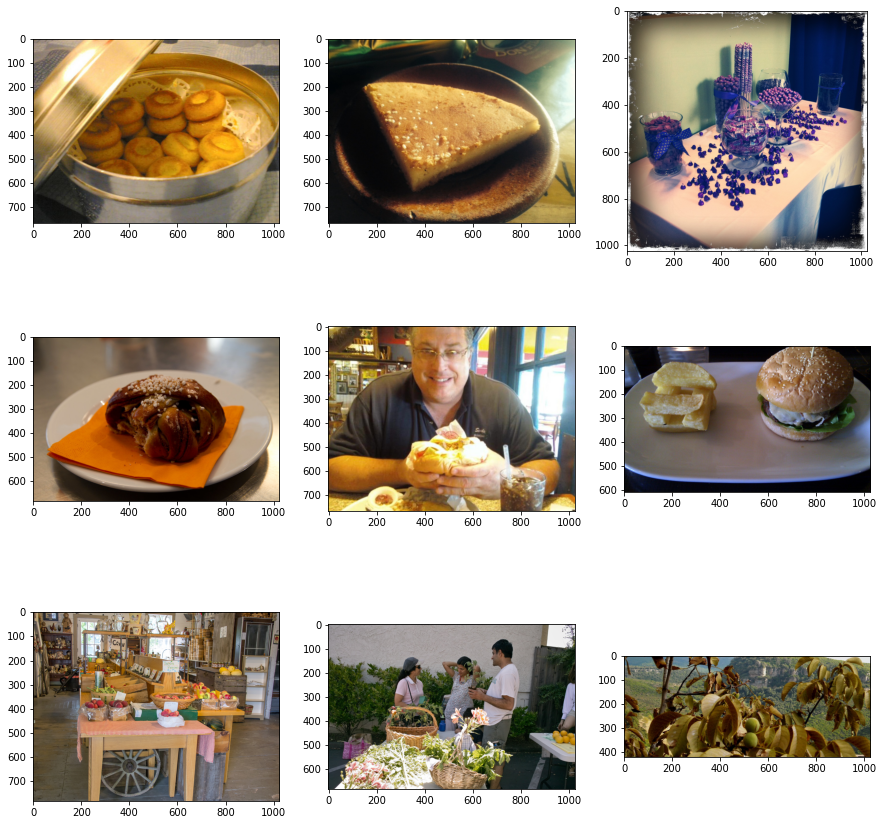

In [ ]:
# show the first 3 images of train datas 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 3
ncols = 3

dessert_fnames = os.listdir(train_dessert_dir)
dessert_fnames.sort()
print(dessert_fnames[:10])

fastfood_fnames = os.listdir(train_fastfood_dir)
fastfood_fnames.sort()
print(fastfood_fnames[:10])

fruit_fnames = os.listdir(train_fruit_dir)
fruit_fnames.sort()
print(fruit_fnames[:10])

fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

next_dessert_pix = [os.path.join(train_dessert_dir, fname) for fname in dessert_fnames[:int(ncols*nrows/3)]]
next_fastfood_pix = [os.path.join(train_fastfood_dir, fname) for fname in fastfood_fnames[:int(ncols*nrows/3)]]
next_fruit_pix = [os.path.join(train_fruit_dir, fname) for fname in fruit_fnames[:int(ncols*nrows/3)]]

for i, img_path in enumerate(next_dessert_pix + next_fastfood_pix + next_fruit_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

Model loading and training

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras import backend as K
import numpy as np

In [ ]:
# InceptionV3 needs inputs in the following format and we set a batch size
img_height = 299
img_width = 299
batch_size = 16

In [ ]:
# load the pretrained model without fully-connected layers
base_model = InceptionV3(weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
# first we trin the last fully-connected layer, what we make now
# other layers are not trainable
for layer in base_model.layers:
    layer.trainable = False

# # after the loaded base model add a GlobalAveragePooling2D layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# network has 3 outputs, and we need softmax actiovation function to 
# 'categorical_crossenropy' cost function
predictions = Dense(3, activation='softmax')(x)

# make the new model
model = Model(inputs=base_model.input, outputs=predictions)

# compile the new model, we use 'adam' optimizer
model.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
# preprocessing of images
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')

Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
# log file
csv_logger = CSVLogger('log.csv', append=True, separator=';')

In [ ]:
# fit the model
model.fit(train_generator, validation_data = validation_generator, epochs=10, steps_per_epoch=25, callbacks=[csv_logger]) 
print("Train finished.")

Epoch 1/10
25/25 [==============================] - 148s 6s/step - loss: 0.9929 - accuracy: 0.5200 - val_loss: 0.7355 - val_accuracy: 0.7133
Epoch 2/10
25/25 [==============================] - 145s 6s/step - loss: 0.5758 - accuracy: 0.7975 - val_loss: 0.6033 - val_accuracy: 0.7600
Epoch 3/10
25/25 [==============================] - 145s 6s/step - loss: 0.5113 - accuracy: 0.8125 - val_loss: 0.5586 - val_accuracy: 0.7733
Epoch 4/10
25/25 [==============================] - 144s 6s/step - loss: 0.4671 - accuracy: 0.7900 - val_loss: 0.5232 - val_accuracy: 0.8000
Epoch 5/10
25/25 [==============================] - 145s 6s/step - loss: 0.4154 - accuracy: 0.8450 - val_loss: 0.4904 - val_accuracy: 0.8033
Epoch 6/10
25/25 [==============================] - 144s 6s/step - loss: 0.3594 - accuracy: 0.8625 - val_loss: 0.4840 - val_accuracy: 0.8100
Epoch 7/10
25/25 [==============================] - 143s 6s/step - loss: 0.3941 - accuracy: 0.8375 - val_loss: 0.4800 - val_accuracy: 0.8100
Epoch 8/10
25

In [ ]:
# now we train the higher layers
# so we print all of layers
print("Convolution layers of Inception V3:")
for i, layer in enumerate(model.layers):
    print(i, layer.name)

Convolution layers of Inception V3:
0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normaliz

In [ ]:
# lower 172 layers are not trainable
# higher layers are trainable
for layer in model.layers[:172]:
       layer.trainable = False
for layer in model.layers[172:]:
       layer.trainable = True

In [ ]:
# we compile the model
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), metrics=['accuracy'], loss='categorical_crossentropy')


In [ ]:
# training
model.fit(train_generator, validation_data = validation_generator, epochs=10, steps_per_epoch=25, callbacks=[csv_logger]) 
print("Train finished.")

Epoch 1/10
25/25 [==============================] - 197s 8s/step - loss: 0.6334 - accuracy: 0.7075 - val_loss: 0.4631 - val_accuracy: 0.8167
Epoch 2/10
25/25 [==============================] - 199s 8s/step - loss: 0.5059 - accuracy: 0.7975 - val_loss: 0.4584 - val_accuracy: 0.8233
Epoch 3/10
25/25 [==============================] - 202s 8s/step - loss: 0.4656 - accuracy: 0.8550 - val_loss: 0.4581 - val_accuracy: 0.8267
Epoch 4/10
25/25 [==============================] - 196s 8s/step - loss: 0.5107 - accuracy: 0.8225 - val_loss: 0.4562 - val_accuracy: 0.8333
Epoch 5/10
25/25 [==============================] - 190s 8s/step - loss: 0.4687 - accuracy: 0.8575 - val_loss: 0.4594 - val_accuracy: 0.8300
Epoch 6/10
25/25 [==============================] - 188s 8s/step - loss: 0.4569 - accuracy: 0.8325 - val_loss: 0.4572 - val_accuracy: 0.8200
Epoch 7/10
25/25 [==============================] - 185s 7s/step - loss: 0.4525 - accuracy: 0.8325 - val_loss: 0.4551 - val_accuracy: 0.8267
Epoch 8/10
25

In [ ]:
# now, lower 268 layers are not trainable
# and higher layers are trainable
for layer in model.layers[:268]:
       layer.trainable = False
for layer in model.layers[268:]:
       layer.trainable = True

In [ ]:
# compile the model again
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), metrics=['accuracy'], loss='categorical_crossentropy')

In [ ]:
#model.fit_generator(train_generator,steps_per_epoch=200,validation_data=validation_generator,validation_steps=10,epochs=3)
#model.fit_generator(train_generator, validation_data = validation_generator, epochs=5, steps_per_epoch=50) 

model.fit(train_generator, validation_data = validation_generator, epochs=10, steps_per_epoch=25, callbacks=[csv_logger]) 
print("Train finished.")

Epoch 1/10
25/25 [==============================] - 141s 6s/step - loss: 0.4092 - accuracy: 0.8500 - val_loss: 0.4462 - val_accuracy: 0.8300
Epoch 2/10
25/25 [==============================] - 142s 6s/step - loss: 0.3731 - accuracy: 0.8675 - val_loss: 0.4405 - val_accuracy: 0.8267
Epoch 3/10
25/25 [==============================] - 140s 6s/step - loss: 0.4161 - accuracy: 0.8600 - val_loss: 0.4389 - val_accuracy: 0.8267
Epoch 4/10
25/25 [==============================] - 137s 5s/step - loss: 0.3607 - accuracy: 0.8675 - val_loss: 0.4372 - val_accuracy: 0.8267
Epoch 5/10
25/25 [==============================] - 136s 5s/step - loss: 0.3726 - accuracy: 0.8750 - val_loss: 0.4368 - val_accuracy: 0.8333
Epoch 6/10
25/25 [==============================] - 136s 5s/step - loss: 0.3611 - accuracy: 0.8675 - val_loss: 0.4344 - val_accuracy: 0.8300
Epoch 7/10
25/25 [==============================] - 139s 6s/step - loss: 0.4004 - accuracy: 0.8525 - val_loss: 0.4332 - val_accuracy: 0.8300
Epoch 8/10
25

In [26]:
# predict test data, and calculate accuracy
paths = ['dessert', 'fast food', 'fruit']

false = 0
true = 0
for path in paths:
   p = os.path.join(test_dir, path)
   for imgage in os.listdir(p):
     img_path = os.path.join(p, imgage)

     img = image.load_img(img_path, target_size=(299, 299)) # Inception V3 esetén 299x299 a bemeneti kép mérete
     x = image.img_to_array(img)
     x = np.expand_dims(x, axis=0)
     x = preprocess_input(x)
     preds = model.predict(x)
     if path == paths[np.argmax(preds)]:
       true += 1
     else:
       false += 1
   print("{} test data finished".format(path))
acc = (true)/(true+false)
print("Accuracy: {}".format(acc))

dessert test data finished
fast food test data finished
fruit test data finished
Accuracy: 0.8233333333333334
